In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(suppress=True, precision=4)

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.270000,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


<Axes: xlabel='Date'>

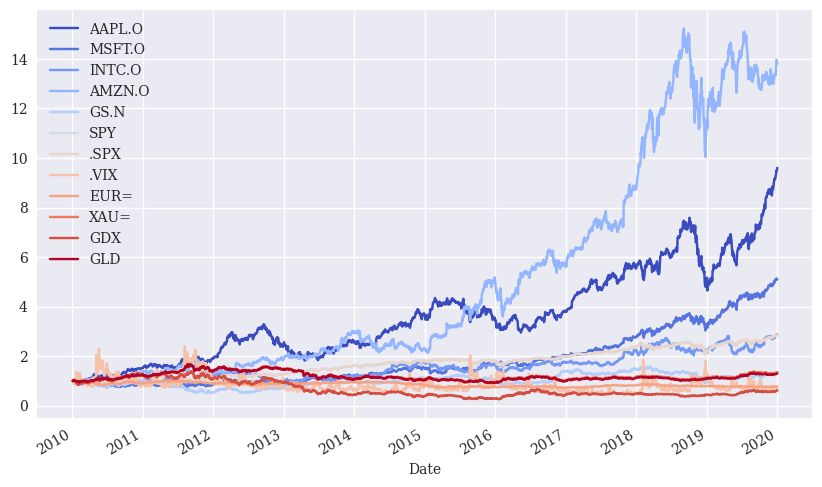

In [4]:
(data / data.iloc[0]).plot(figsize=(10, 6), cmap='coolwarm')

In [5]:
lags = 7

In [6]:
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric])
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        df[col] = df[ric].shift(lag)
        cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [7]:
dfs = {}
for sym in data.columns:
    df, cols = add_lags(data, sym, lags)
    dfs[sym] = df

In [8]:
dfs[sym].head(7)

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-13,111.54,110.49,112.85,111.37,110.82,111.51,109.70,109.80
2010-01-14,112.03,111.54,110.49,112.85,111.37,110.82,111.51,109.70
2010-01-15,110.86,112.03,111.54,110.49,112.85,111.37,110.82,111.51
2010-01-19,111.52,110.86,112.03,111.54,110.49,112.85,111.37,110.82
2010-01-20,108.94,111.52,110.86,112.03,111.54,110.49,112.85,111.37
2010-01-21,107.37,108.94,111.52,110.86,112.03,111.54,110.49,112.85
2010-01-22,107.17,107.37,108.94,111.52,110.86,112.03,111.54,110.49


In [9]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']

In [10]:
regs = {}
for sym in data.columns:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    regs[sym] = reg

In [11]:
tuple(regs.values())

(array([ 1.0106, -0.0592,  0.0258,  0.0535, -0.0172,  0.006 , -0.0184]),
 array([ 0.8928,  0.0112,  0.1175, -0.0832, -0.0258,  0.0567,  0.0323]),
 array([ 0.9519,  0.0579,  0.049 , -0.0772, -0.0373,  0.0449,  0.0112]),
 array([ 0.9799, -0.0134,  0.0206,  0.0007,  0.0525, -0.0452,  0.0056]),
 array([ 0.9806,  0.0342, -0.0172,  0.0042, -0.0387,  0.0585, -0.0215]),
 array([ 0.9692,  0.0067,  0.0228, -0.0244, -0.0237,  0.0379,  0.0121]),
 array([ 0.9672,  0.0106,  0.0219, -0.0252, -0.0318,  0.0515,  0.0063]),
 array([ 0.8823,  0.0591, -0.0289,  0.0284, -0.0256,  0.0511,  0.0306]),
 array([ 0.9859,  0.0239, -0.0484,  0.0508, -0.0217,  0.0149, -0.0055]),
 array([ 0.9864,  0.0069,  0.0166, -0.0215,  0.0044,  0.0198, -0.0125]),
 array([ 0.9765,  0.0096, -0.0039,  0.0223, -0.0364,  0.0379, -0.0065]),
 array([ 0.9766,  0.0246,  0.006 , -0.0142, -0.0047,  0.0223, -0.0106]))

In [12]:
rega = np.stack(tuple(regs.values()))
rega

array([[ 1.0106, -0.0592,  0.0258,  0.0535, -0.0172,  0.006 , -0.0184],
       [ 0.8928,  0.0112,  0.1175, -0.0832, -0.0258,  0.0567,  0.0323],
       [ 0.9519,  0.0579,  0.049 , -0.0772, -0.0373,  0.0449,  0.0112],
       [ 0.9799, -0.0134,  0.0206,  0.0007,  0.0525, -0.0452,  0.0056],
       [ 0.9806,  0.0342, -0.0172,  0.0042, -0.0387,  0.0585, -0.0215],
       [ 0.9692,  0.0067,  0.0228, -0.0244, -0.0237,  0.0379,  0.0121],
       [ 0.9672,  0.0106,  0.0219, -0.0252, -0.0318,  0.0515,  0.0063],
       [ 0.8823,  0.0591, -0.0289,  0.0284, -0.0256,  0.0511,  0.0306],
       [ 0.9859,  0.0239, -0.0484,  0.0508, -0.0217,  0.0149, -0.0055],
       [ 0.9864,  0.0069,  0.0166, -0.0215,  0.0044,  0.0198, -0.0125],
       [ 0.9765,  0.0096, -0.0039,  0.0223, -0.0364,  0.0379, -0.0065],
       [ 0.9766,  0.0246,  0.006 , -0.0142, -0.0047,  0.0223, -0.0106]])

In [13]:
regd = pd.DataFrame(rega, columns=cols, index=data.columns)
regd

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
AAPL.O,1.010572,-0.059223,0.025791,0.053513,-0.017241,0.006026,-0.018444
MSFT.O,0.892760,0.011245,0.117456,-0.083167,-0.025838,0.056735,0.032256
INTC.O,0.951860,0.057875,0.049000,-0.077168,-0.037288,0.044927,0.011243
AMZN.O,0.979914,-0.013370,0.020554,0.000707,0.052510,-0.045160,0.005589
GS.N,0.980616,0.034161,-0.017218,0.004189,-0.038709,0.058471,-0.021468
SPY,0.969174,0.006678,0.022766,-0.024438,-0.023662,0.037870,0.012073
.SPX,0.967234,0.010588,0.021875,-0.025242,-0.031784,0.051474,0.006321
.VIX,0.882277,0.059139,-0.028948,0.028449,-0.025578,0.051097,0.030567
EUR=,0.985907,0.023882,-0.048428,0.050793,-0.021690,0.014885,-0.005478
XAU=,0.986444,0.006938,0.016628,-0.021549,0.004358,0.019784,-0.012540


<Axes: >

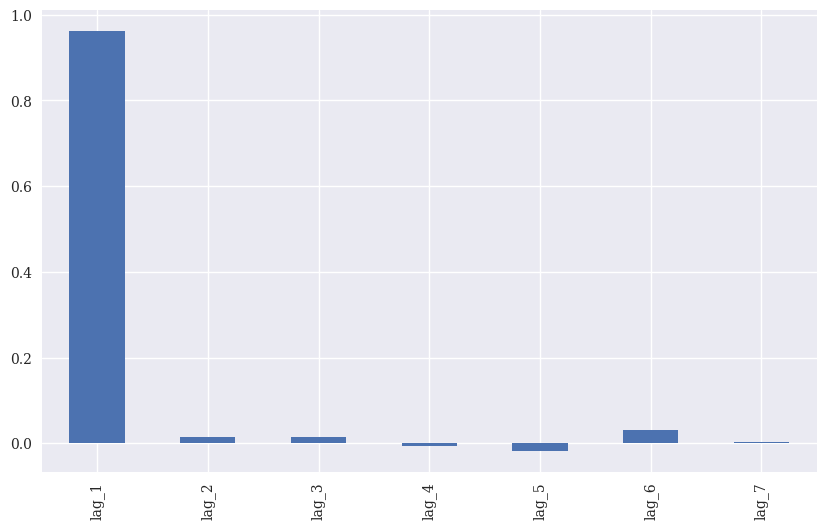

In [14]:
regd.mean().plot(kind='bar', figsize=(10, 6))

In [15]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.000000,0.997249,0.994624,0.991995,0.989327,0.986700,0.984142,0.981525
lag_1,0.997249,1.000000,0.997246,0.994625,0.991997,0.989331,0.986709,0.984154
lag_2,0.994624,0.997246,1.000000,0.997245,0.994623,0.991999,0.989332,0.986712
lag_3,0.991995,0.994625,0.997245,1.000000,0.997245,0.994625,0.992003,0.989338
lag_4,0.989327,0.991997,0.994623,0.997245,1.000000,0.997246,0.994629,0.992009
lag_5,0.986700,0.989331,0.991999,0.994625,0.997246,1.000000,0.997246,0.994631
lag_6,0.984142,0.986709,0.989332,0.992003,0.994629,0.997246,1.000000,0.997247
lag_7,0.981525,0.984154,0.986712,0.989338,0.992009,0.994631,0.997247,1.000000


In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(data[sym].dropna())

(-1.9488969577009942,
 0.3094193074034723,
 0,
 2515,
 {'1%': -3.4329527780962255,
  '5%': -2.8626898965523724,
  '10%': -2.567382133955709},
 8446.683102944744)

In [28]:
rets = np.log(data / data.shift(1))

In [29]:
rets.dropna(inplace=True)

In [30]:
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,0.003322,0.002878,-0.050024,0.006544,0.003704,0.014959,0.004951
2010-01-11,-0.008861,-0.012802,0.005744,-0.024350,-0.015902,0.001396,0.001745,-0.032514,0.006984,0.014419,0.006599,0.013202
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000950,-0.000191,0.003034,-0.002116,0.003573,0.000031,-0.000195,0.004747,0.000090,0.009075,0.031546,0.009388
2019-12-26,0.019646,0.008163,0.006877,0.043506,0.005638,0.005309,0.005115,-0.001580,0.000811,0.008297,0.014548,0.007827
2019-12-27,-0.000380,0.001826,0.004337,0.000551,-0.002382,-0.000248,0.000034,0.059834,0.007094,-0.000583,-0.007248,-0.000351


In [35]:
dfs = {}
for sym in data:
    df, cols = add_lags(rets, sym, lags)
    mu, std = df[cols].mean(), df[cols].std()
    df[cols] = (df[cols] - mu) / std
    dfs[sym] = df

lag_1    0.000911
lag_2    0.000904
lag_3    0.000901
lag_4    0.000896
lag_5    0.000894
lag_6    0.000882
lag_7    0.000883
dtype: float64 lag_1    0.016269
lag_2    0.016271
lag_3    0.016272
lag_4    0.016268
lag_5    0.016268
lag_6    0.016269
lag_7    0.016269
dtype: float64
lag_1    0.000660
lag_2    0.000661
lag_3    0.000655
lag_4    0.000655
lag_5    0.000651
lag_6    0.000648
lag_7    0.000644
dtype: float64 lag_1    0.014342
lag_2    0.014342
lag_3    0.014344
lag_4    0.014344
lag_5    0.014346
lag_6    0.014346
lag_7    0.014345
dtype: float64
lag_1    0.000424
lag_2    0.000420
lag_3    0.000421
lag_4    0.000422
lag_5    0.000417
lag_6    0.000414
lag_7    0.000407
dtype: float64 lag_1    0.015484
lag_2    0.015487
lag_3    0.015487
lag_4    0.015488
lag_5    0.015489
lag_6    0.015489
lag_7    0.015485
dtype: float64
lag_1    0.001066
lag_2    0.001062
lag_3    0.001052
lag_4    0.001045
lag_5    0.001039
lag_6    0.001031
lag_7    0.001034
dtype: float64 lag_1    0.01

In [34]:
dfs

{'AAPL.O':               AAPL.O     lag_1     lag_2     lag_3     lag_4     lag_5  \
 Date                                                                     
 2010-01-14 -0.005808  0.804955 -0.758680 -0.599896  0.352274 -0.168718   
 2010-01-15 -0.016853 -0.413017  0.805303 -0.758419 -0.599721  0.352340   
 2010-01-19  0.043288 -1.091898 -0.412552  0.805454 -0.758282 -0.599649   
 2010-01-20 -0.015536  2.604727 -1.091368 -0.412316  0.805967 -0.758209   
 2010-01-21 -0.017404 -1.010919  2.604902 -1.091083 -0.412095  0.806031   
 ...              ...       ...       ...       ...       ...       ...   
 2019-12-24  0.000950  0.938931 -0.182999  0.006128 -0.202099  0.065708   
 2019-12-26  0.019646  0.002412  0.939266 -0.182778  0.006449 -0.202029   
 2019-12-27 -0.000380  1.151566  0.002837  0.939408 -0.182503  0.006517   
 2019-12-30  0.005918 -0.079323  1.151881  0.003044  0.939952 -0.182433   
 2019-12-31  0.007280  0.307734 -0.078890  1.152008  0.003364  0.940016   
 
             

In [32]:
dfs[sym].head()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-14,0.004383,0.957016,-2.169168,1.338562,0.495878,-0.643425,1.661323,-0.102756
2010-01-15,-0.010499,0.437942,0.957072,-2.168945,1.338780,0.496562,-0.643624,1.661401
2010-01-19,0.005936,-1.084249,0.438481,0.956179,-2.168991,1.339545,0.495757,-0.643545
2010-01-20,-0.023407,0.596726,-1.082292,0.437772,0.956368,-2.168567,1.338291,0.495834
2010-01-21,-0.014516,-2.404546,0.597117,-1.082458,0.437922,0.957096,-2.167953,1.338369


In [23]:
adfuller(dfs[sym]['lag_1'])

(-51.56825150582551,
 0.0,
 0,
 2507,
 {'1%': -3.4329610922579095,
  '5%': -2.8626935681060375,
  '10%': -2.567384088736619},
 7017.165474260226)

In [24]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.000000,-0.029691,0.000300,0.012635,-0.002562,-0.005939,0.009852,-0.001343
lag_1,-0.029691,1.000000,-0.030501,0.000814,0.012765,-0.002876,-0.005323,0.009804
lag_2,0.000300,-0.030501,1.000000,-0.031617,0.000320,0.013234,-0.004335,-0.005237
lag_3,0.012635,0.000814,-0.031617,1.000000,-0.031329,-0.000007,0.014115,-0.004387
lag_4,-0.002562,0.012765,0.000320,-0.031329,1.000000,-0.031761,0.000226,0.014067
lag_5,-0.005939,-0.002876,0.013234,-0.000007,-0.031761,1.000000,-0.032289,0.000217
lag_6,0.009852,-0.005323,-0.004335,0.014115,0.000226,-0.032289,1.000000,-0.032351
lag_7,-0.001343,0.009804,-0.005237,-0.004387,0.014067,0.000217,-0.032351,1.000000


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
for sym in data:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    pred = np.dot(df[cols], reg)
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'OLS | {sym:10s} | acc={acc:.4f}')

OLS | AAPL.O     | acc=0.5056
OLS | MSFT.O     | acc=0.5088
OLS | INTC.O     | acc=0.5040
OLS | AMZN.O     | acc=0.5048
OLS | GS.N       | acc=0.5080
OLS | SPY        | acc=0.5080
OLS | .SPX       | acc=0.5167
OLS | .VIX       | acc=0.5291
OLS | EUR=       | acc=0.4984
OLS | XAU=       | acc=0.5207
OLS | GDX        | acc=0.5307
OLS | GLD        | acc=0.5072


In [27]:
from sklearn.neural_network import MLPRegressor

In [36]:
for sym in data.columns:
    df = dfs[sym]
    model = MLPRegressor(hidden_layer_sizes=[512],
                         random_state=100,
                         max_iter=1000,
                         early_stopping=True,
                         validation_fraction=0.15,
                         shuffle=False)
    model.fit(df[cols], df[sym])
    pred = model.predict(df[cols])
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'MLP | {sym:10s} | acc={acc:.4f}')

MLP | AAPL.O     | acc=0.6005
MLP | MSFT.O     | acc=0.5853
MLP | INTC.O     | acc=0.5766
MLP | AMZN.O     | acc=0.5510
MLP | GS.N       | acc=0.6527
MLP | SPY        | acc=0.5419
MLP | .SPX       | acc=0.5399
MLP | .VIX       | acc=0.6579
MLP | EUR=       | acc=0.5642
MLP | XAU=       | acc=0.5522
MLP | GDX        | acc=0.6029
MLP | GLD        | acc=0.5259


In [37]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [40]:
np.random.seed(100)
tf.random.set_seed(100)

In [41]:
def create_model(problem='regression'):
    model = Sequential()
    model.add(Dense(512, input_dim=len(cols),
                    activation='relu'))
    if problem == 'regression':
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [42]:
for sym in data.columns[:]:
    df = dfs[sym]
    model = create_model()
    model.fit(df[cols], df[sym], epochs=25, verbose=False)
    pred = model.predict(df[cols])
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'DNN | {sym:10s} | acc={acc:.4f}')

79/79 [==============================] - 0s 316us/step
DNN | AAPL.O     | acc=0.6272
79/79 [==============================] - 0s 314us/step
DNN | MSFT.O     | acc=0.6108
79/79 [==============================] - 0s 554us/step
DNN | INTC.O     | acc=0.6423
79/79 [==============================] - 0s 352us/step
DNN | AMZN.O     | acc=0.5833
79/79 [==============================] - 0s 305us/step
DNN | GS.N       | acc=0.5965
79/79 [==============================] - 0s 297us/step
DNN | SPY        | acc=0.6021
79/79 [==============================] - 0s 476us/step
DNN | .SPX       | acc=0.5518
79/79 [==============================] - 0s 289us/step
DNN | .VIX       | acc=0.6236
79/79 [==============================] - 0s 294us/step
DNN | EUR=       | acc=0.5610
79/79 [==============================] - 0s 509us/step
DNN | XAU=       | acc=0.6148
79/79 [==============================] - 0s 312us/step
DNN | GDX        | acc=0.6567
79/79 [==============================] - 0s 294us/step
DNN | GLD 

In [43]:
split = int(len(dfs[sym]) * 0.8)

In [44]:
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    reg = np.linalg.lstsq(train[cols], train[sym], rcond=-1)[0]
    test = df.iloc[split:]
    pred = np.dot(test[cols], reg)
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'OLS | {sym:10s} | acc={acc:.4f}')

OLS | AAPL.O     | acc=0.5219
OLS | MSFT.O     | acc=0.4960
OLS | INTC.O     | acc=0.5418
OLS | AMZN.O     | acc=0.4841
OLS | GS.N       | acc=0.4980
OLS | SPY        | acc=0.5020
OLS | .SPX       | acc=0.5120
OLS | .VIX       | acc=0.5458
OLS | EUR=       | acc=0.4482
OLS | XAU=       | acc=0.5299
OLS | GDX        | acc=0.5159
OLS | GLD        | acc=0.5100


In [45]:
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    model = MLPRegressor(hidden_layer_sizes=[512],
                         random_state=100,
                         max_iter=1000,
                         early_stopping=True,
                         validation_fraction=0.15,
                         shuffle=False)
    model.fit(train[cols], train[sym])
    test = df.iloc[split:]
    pred = model.predict(test[cols])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'MLP | {sym:10s} | acc={acc:.4f}')

MLP | AAPL.O     | acc=0.4920
MLP | MSFT.O     | acc=0.5279
MLP | INTC.O     | acc=0.5279
MLP | AMZN.O     | acc=0.4641
MLP | GS.N       | acc=0.5040
MLP | SPY        | acc=0.5259
MLP | .SPX       | acc=0.5478
MLP | .VIX       | acc=0.5279
MLP | EUR=       | acc=0.4980
MLP | XAU=       | acc=0.5239
MLP | GDX        | acc=0.4880
MLP | GLD        | acc=0.5000


In [46]:
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    model = create_model()
    model.fit(train[cols], train[sym], epochs=50, verbose=False)
    test = df.iloc[split:]
    pred = model.predict(test[cols])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'DNN | {sym:10s} | acc={acc:.4f}')

16/16 [==============================] - 0s 383us/step
DNN | AAPL.O     | acc=0.5060
16/16 [==============================] - 0s 411us/step
DNN | MSFT.O     | acc=0.5060
16/16 [==============================] - 0s 339us/step
DNN | INTC.O     | acc=0.4980
16/16 [==============================] - 0s 390us/step
DNN | AMZN.O     | acc=0.4582
16/16 [==============================] - 0s 397us/step
DNN | GS.N       | acc=0.5359
16/16 [==============================] - 0s 400us/step
DNN | SPY        | acc=0.4880
16/16 [==============================] - 0s 393us/step
DNN | .SPX       | acc=0.5438
16/16 [==============================] - 0s 361us/step
DNN | .VIX       | acc=0.4980
16/16 [==============================] - 0s 409us/step
DNN | EUR=       | acc=0.5100
16/16 [==============================] - 0s 354us/step
DNN | XAU=       | acc=0.4900
16/16 [==============================] - 0s 393us/step
DNN | GDX        | acc=0.4781
16/16 [==============================] - 0s 398us/step
DNN | GLD 

In [47]:
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [48]:
def add_lags(data, ric, lags, window=50):
    cols = []
    df = pd.DataFrame(data[ric])
    df.dropna(inplace=True)
    df['r'] = np.log(df / df.shift())
    df['sma'] = df[ric].rolling(window).mean()
    df['min'] = df[ric].rolling(window).min()
    df['max'] = df[ric].rolling(window).max()
    df['mom'] = df['r'].rolling(window).mean()
    df['vol'] = df['r'].rolling(window).std()
    df.dropna(inplace=True)
    df['d'] = np.where(df['r'] > 0, 1, 0)
    features = [ric, 'r', 'd', 'sma', 'min', 'max', 'mom', 'vol']

    for f in features:
        for lag in range(1, lags + 1):
            col = f'{f}_lag_{lag}'
            df[col] = df[f].shift(lag)
            cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [49]:
lags = 5
dfs = {}

In [50]:
for ric in data:
    print(ric)
    df, cols = add_lags(data, ric, lags)
    dfs[ric] = df.dropna(), cols

AAPL.O
MSFT.O
INTC.O
AMZN.O
GS.N
SPY
.SPX
.VIX
EUR=
XAU=
GDX
GLD


In [58]:
dfs

{'AAPL.O': (                AAPL.O         r         sma         min         max  \
  Date                                                                   
  2010-03-24   32.767110  0.004413   29.798067   27.435687   32.767110   
  2010-03-25   32.378539 -0.011929   29.852153   27.435687   32.767110   
  2010-03-26   32.985681  0.018578   29.910010   27.435687   32.985681   
  2010-03-29   33.198538  0.006432   29.975610   27.435687   33.198538   
  2010-03-30   33.692109  0.014758   30.061081   27.435687   33.692109   
  ...                ...       ...         ...         ...         ...   
  2019-12-24  284.270000  0.000950  260.642400  234.370000  284.270000   
  2019-12-26  289.910000  0.019646  261.734200  234.370000  289.910000   
  2019-12-27  289.800000 -0.000380  262.842800  235.280000  289.910000   
  2019-12-30  291.520000  0.005918  263.967600  236.410000  291.520000   
  2019-12-31  293.650000  0.007280  265.112400  239.960000  293.650000   
  
                   mom   

In [57]:
from sklearn.neural_network import MLPClassifier

In [59]:
for ric in data:
    model = MLPClassifier(hidden_layer_sizes=[512],
                          random_state=100,
                          max_iter=1000,
                          early_stopping=True,
                          validation_fraction=0.15,
                          shuffle=False)
    df, cols = dfs[ric]
    df[cols] = (df[cols] - df[cols].mean()) / df[cols].std()
    model.fit(df[cols], df['d'])
    pred = model.predict(df[cols])
    acc = accuracy_score(df['d'], pred)
    print(f'IN_SAMPLE | {ric:7s} | acc={acc:.4f}')

IN_SAMPLE | AAPL.O  | acc=0.5510
IN_SAMPLE | MSFT.O  | acc=0.5376
IN_SAMPLE | INTC.O  | acc=0.5607
IN_SAMPLE | AMZN.O  | acc=0.5559
IN_SAMPLE | GS.N    | acc=0.5794
IN_SAMPLE | SPY     | acc=0.5729
IN_SAMPLE | .SPX    | acc=0.5941
IN_SAMPLE | .VIX    | acc=0.6940
IN_SAMPLE | EUR=    | acc=0.5766
IN_SAMPLE | XAU=    | acc=0.5672
IN_SAMPLE | GDX     | acc=0.5847
IN_SAMPLE | GLD     | acc=0.5567


In [61]:
for ric in data:
    model = create_model('classification')
    df, cols = dfs[ric]
    df[cols] = (df[cols] - df[cols].mean()) / df[cols].std()
    model.fit(df[cols], df['d'], epochs=50, verbose=False)
    predict = model.predict(df[cols])
    print(predict)
    pred = np.where(predict > 0.5, 1, 0)
    acc = accuracy_score(df['d'], pred)
    print(f'IN_SAMPLE | {ric:7s} | acc={acc:.4f}')

77/77 [==============================] - 0s 331us/step
[[0.6676]
 [0.6684]
 [0.7531]
 ...
 [0.4499]
 [0.4289]
 [0.4251]]
IN_SAMPLE | AAPL.O  | acc=0.7009
77/77 [==============================] - 0s 314us/step
[[0.4222]
 [0.6189]
 [0.4637]
 ...
 [0.9365]
 [0.87  ]
 [0.8118]]
IN_SAMPLE | MSFT.O  | acc=0.6916
77/77 [==============================] - 0s 341us/step
[[0.4082]
 [0.4491]
 [0.3175]
 ...
 [0.6606]
 [0.5139]
 [0.5826]]
IN_SAMPLE | INTC.O  | acc=0.6948
77/77 [==============================] - 0s 321us/step
[[0.6151]
 [0.4641]
 [0.4432]
 ...
 [0.779 ]
 [0.627 ]
 [0.7459]]
IN_SAMPLE | AMZN.O  | acc=0.6684
77/77 [==============================] - 0s 312us/step
[[0.4612]
 [0.4639]
 [0.6421]
 ...
 [0.3213]
 [0.2231]
 [0.4045]]
IN_SAMPLE | GS.N    | acc=0.6948
77/77 [==============================] - 0s 318us/step
[[0.5355]
 [0.4905]
 [0.6322]
 ...
 [0.4201]
 [0.6896]
 [0.6767]]
IN_SAMPLE | SPY     | acc=0.6855
77/77 [==============================] - 0s 320us/step
[[0.6563]
 [0.4126]
 

In [62]:
def train_test_model(model):
    for ric in data:
        df, cols = dfs[ric]
        split = int(len(df) * 0.85)
        train = df.iloc[:split].copy()
        mu, std = train[cols].mean(), train[cols].std()
        train[cols] = (train[cols] - mu) / std
        model.fit(train[cols], train['d'])

        test = df.iloc[split:].copy()
        test[cols] = (test[cols] - mu) / std
        pred = model.predict(test[cols])
        acc = accuracy_score(test['d'], pred)
        print(f'OUT-OF-SAMPLE | {ric:7s} | acc={acc:.4f}')

In [63]:
model_mlp = MLPClassifier(hidden_layer_sizes=[512],
                          random_state=100,
                          max_iter=1000,
                          early_stopping=True,
                          validation_fraction=0.15,
                          shuffle=False)

In [64]:
train_test_model(model_mlp)

OUT-OF-SAMPLE | AAPL.O  | acc=0.4432
OUT-OF-SAMPLE | MSFT.O  | acc=0.4595
OUT-OF-SAMPLE | INTC.O  | acc=0.5000
OUT-OF-SAMPLE | AMZN.O  | acc=0.5270
OUT-OF-SAMPLE | GS.N    | acc=0.4838
OUT-OF-SAMPLE | SPY     | acc=0.4811
OUT-OF-SAMPLE | .SPX    | acc=0.5027
OUT-OF-SAMPLE | .VIX    | acc=0.5676
OUT-OF-SAMPLE | EUR=    | acc=0.4649
OUT-OF-SAMPLE | XAU=    | acc=0.5514
OUT-OF-SAMPLE | GDX     | acc=0.5162
OUT-OF-SAMPLE | GLD     | acc=0.4946


In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
base_estimator = MLPClassifier(hidden_layer_sizes=[256],
                               random_state=100,
                               max_iter=1000,
                               early_stopping=True,
                               validation_fraction=0.15,
                               shuffle=False)

In [69]:
model_bag = BaggingClassifier(estimator=base_estimator,
                              n_estimators=35,
                              max_samples=0.25,
                              max_features=0.5,
                              bootstrap=False,
                              bootstrap_features=True,
                              n_jobs=8,
                              random_state=100)

In [70]:
train_test_model(model_bag)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5000
OUT-OF-SAMPLE | MSFT.O  | acc=0.5703
OUT-OF-SAMPLE | INTC.O  | acc=0.5054
OUT-OF-SAMPLE | AMZN.O  | acc=0.5270
OUT-OF-SAMPLE | GS.N    | acc=0.5135
OUT-OF-SAMPLE | SPY     | acc=0.5568
OUT-OF-SAMPLE | .SPX    | acc=0.5514
OUT-OF-SAMPLE | .VIX    | acc=0.5432
OUT-OF-SAMPLE | EUR=    | acc=0.5054
OUT-OF-SAMPLE | XAU=    | acc=0.5351
OUT-OF-SAMPLE | GDX     | acc=0.5054
OUT-OF-SAMPLE | GLD     | acc=0.5189


In [71]:
url = 'http://hilpisch.com/aiif_eikon_id_data.csv'

In [72]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5529 entries, 2019-03-01 00:00:00 to 2020-01-01 00:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  3384 non-null   float64
 1   MSFT.O  3378 non-null   float64
 2   INTC.O  3275 non-null   float64
 3   AMZN.O  3381 non-null   float64
 4   GS.N    1686 non-null   float64
 5   SPY     3388 non-null   float64
 6   .SPX    1802 non-null   float64
 7   .VIX    2959 non-null   float64
 8   EUR=    5429 non-null   float64
 9   XAU=    5149 non-null   float64
 10  GDX     3173 non-null   float64
 11  GLD     3351 non-null   float64
dtypes: float64(12)
memory usage: 561.5 KB


In [74]:
lags = 5

In [75]:
dfs = {}
for ric in data:
    df, cols = add_lags(data, ric, lags)
    dfs[ric] = df, cols

In [76]:
train_test_model(model_mlp)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5420
OUT-OF-SAMPLE | MSFT.O  | acc=0.4930
OUT-OF-SAMPLE | INTC.O  | acc=0.5549
OUT-OF-SAMPLE | AMZN.O  | acc=0.4709
OUT-OF-SAMPLE | GS.N    | acc=0.5184
OUT-OF-SAMPLE | SPY     | acc=0.4860
OUT-OF-SAMPLE | .SPX    | acc=0.5019
OUT-OF-SAMPLE | .VIX    | acc=0.4885
OUT-OF-SAMPLE | EUR=    | acc=0.5130
OUT-OF-SAMPLE | XAU=    | acc=0.4824
OUT-OF-SAMPLE | GDX     | acc=0.4765
OUT-OF-SAMPLE | GLD     | acc=0.5455


In [77]:
train_test_model(model_bag)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5660
OUT-OF-SAMPLE | MSFT.O  | acc=0.5551
OUT-OF-SAMPLE | INTC.O  | acc=0.5072
OUT-OF-SAMPLE | AMZN.O  | acc=0.4830
OUT-OF-SAMPLE | GS.N    | acc=0.5020
OUT-OF-SAMPLE | SPY     | acc=0.4680
OUT-OF-SAMPLE | .SPX    | acc=0.4677
OUT-OF-SAMPLE | .VIX    | acc=0.5161
OUT-OF-SAMPLE | EUR=    | acc=0.5242
OUT-OF-SAMPLE | XAU=    | acc=0.5229
OUT-OF-SAMPLE | GDX     | acc=0.5107
OUT-OF-SAMPLE | GLD     | acc=0.5475
